In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from ete3 import Tree
from io import StringIO
from Bio import Phylo

In [ ]:
genes = []
mutation_rate = 0.1

In [ ]:
fitness_df = pd.read_csv("fitness.csv")

In [ ]:
data = ""
with open("./Refs/mp.txt", 'r') as file:
    data = file.read()

terms = data.strip().split("[Term]\n")
arr = []
for term in terms:
    if term:
        lines = term.strip().split("\n")
        term_data = {
            "id": "",
        }
    
        for line in lines:
            if line:
                if ":" in line:
                    key, value = line.split(":", 1)
                    key = key.strip().lower()
                    if key == "id":
                        term_data["id"] = value.strip()
            arr.append(term_data)
    df = pd.DataFrame(arr)

In [ ]:
df = df["id"].unique()

In [ ]:
fitness_scores = []
for i in range(len(fitness_df)):
    for j in range(len(df)):
        if fitness_df["id"][i] == df[j]:
            fitness_scores.append(fitness_df["fitness_score"][i])

In [ ]:
df = pd.DataFrame([{"id": id, "fitness": fitness} for id, fitness in zip(df, fitness_scores)])

In [ ]:
df

,id,fitness
0,MP:0004738,-6
1,MP:0002638,0
2,MP:0000376,0
3,MP:0003449,-6
4,MP:0000410,-6
5,MP:0000923,-1
6,MP:0001713,-6
7,MP:0002276,-2
8,MP:0001191,1
9,MP:0000130,-6


In [ ]:
class Rat:
    def __init__(self, id, mps, fitness):
        self.id = id
        self.mps = mps
        self.fitness = fitness
    
    def show(self):
        return f"(fitness:{self.fitness})"
    
    def select_random_gene(self):
        return [random.choice(self.mps) for _ in range(5)]
    
    def __repr__(self):
        return f"{self.id}f{self.fitness}"
    
    def __str__(self):
        return f"{self.id}f{self.fitness}"

In [ ]:
df.iloc[2, 1]

0

In [ ]:
def breed(rat1, rat2):
    genes = [*rat1.select_random_gene(), *rat2.select_random_gene()]
    fit = 0
    identity = chr(ord(rat1.id[0]) + 1) + str(random.randint(1, 100)) if ord(rat1.id[0]) < 90 else chr(65) 
    for i in genes:
        for j in range(len(df)):
            if df["id"][j] == i:
                fit += df.iloc[j, 1]
    
    return Rat(identity, genes, fit)

In [ ]:
rats = [Rat(f"A{random.randint(1, 100)}", df["id"].tolist(), sum(list(map(lambda f: f, df["fitness"])))), Rat(f"A{random.randint(1, 100)}", df["id"].tolist(), sum(list(map(lambda f: f, df["fitness"]))))]

In [ ]:
def generate_newick_tree():
    tree = []
    prev_gen = [random.choice(rats)]
    tree.append(prev_gen)
    for i in range(1, 5):
        current_gen = [breed(random.choice(prev_gen), random.choice(prev_gen)) for _ in range(2)]
        prev_gen.insert(-1, current_gen)
        prev_gen = current_gen
    
    return tree

tree = str(generate_newick_tree())      

In [ ]:
newick_tree = tree.replace("[", "(").replace("]", ")")[1: -1] + ";"

<Figure size 1500x1000 with 0 Axes>

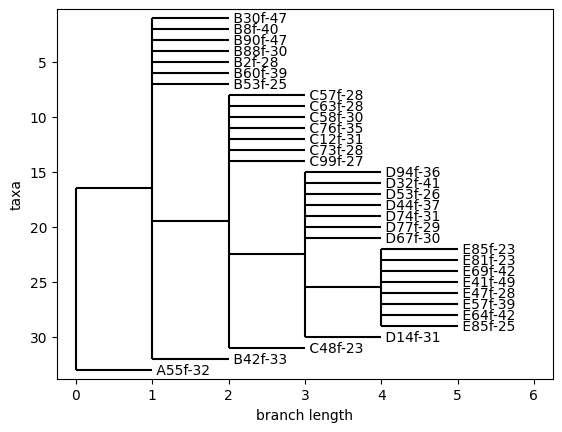

In [ ]:
tree = Phylo.read(StringIO(newick_tree), "newick")

plt.figure(figsize=(15, 10))
Phylo.draw(tree)